<a href="https://colab.research.google.com/github/tejeshvaish/TensorFlow-Course/blob/master/ZOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import torch # main python library to implement DL models
# import jovian
import torch.nn as nn   # nn models 
import pandas as pd     # our lovely panda
import matplotlib.pyplot as plt
import torch.nn.functional as fun     
from torch.utils.data import DataLoader, TensorDataset, random_split  # some utility functions to get going. 

In [101]:
name = "car.csv"
df = pd.read_csv(name)
df.head()
df.drop(['Car_Name'],axis=1)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [102]:
input_cols = ["Year","Present_Price","Kms_Driven","Owner"]
categorical_cols = ["Fuel_Type","Seller_Type","Transmission"]
output_cols = ["Selling_Price"]

In [103]:
df.Year = df.Year * ord('Z')/100
df.Selling_Price = df.Selling_Price * ord('O')/100.
df.Kms_Driven = df.Kms_Driven * ord('O')/100.



In [104]:
df.head(5) #now the distinct numbers will have a continous pattern! 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,1812.6,2.6465,5.59,21330.0,Petrol,Dealer,Manual,0
1,sx4,1811.7,3.7525,9.54,33970.0,Diesel,Dealer,Manual,0
2,ciaz,1815.3,5.7275,9.85,5451.0,Petrol,Dealer,Manual,0
3,wagon r,1809.9,2.2515,4.15,4108.0,Petrol,Dealer,Manual,0
4,swift,1812.6,3.6340,6.87,33535.5,Diesel,Dealer,Manual,0


In [105]:
# to use pytorch , I have to convert the dataframe rows into a tensro(numpy array)
df1 = df.copy(deep=None)
# now 1st I will convert non - number colum to numbered columns
for col in categorical_cols:
        df1[col] = df1[col].astype('category').cat.codes
 # Extract input & outupts as numpy arrays
X = df1[input_cols].to_numpy()
y = df1[output_cols].to_numpy()
df1.drop(['Car_Name'],axis=1)
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,1812.6,2.6465,5.59,21330.0,2,0,1,0
1,sx4,1811.7,3.7525,9.54,33970.0,1,0,1,0
2,ciaz,1815.3,5.7275,9.85,5451.0,2,0,1,0
3,wagon r,1809.9,2.2515,4.15,4108.0,2,0,1,0
4,swift,1812.6,3.6340,6.87,33535.5,1,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6ca6e1cd0>,
      dtype=object)

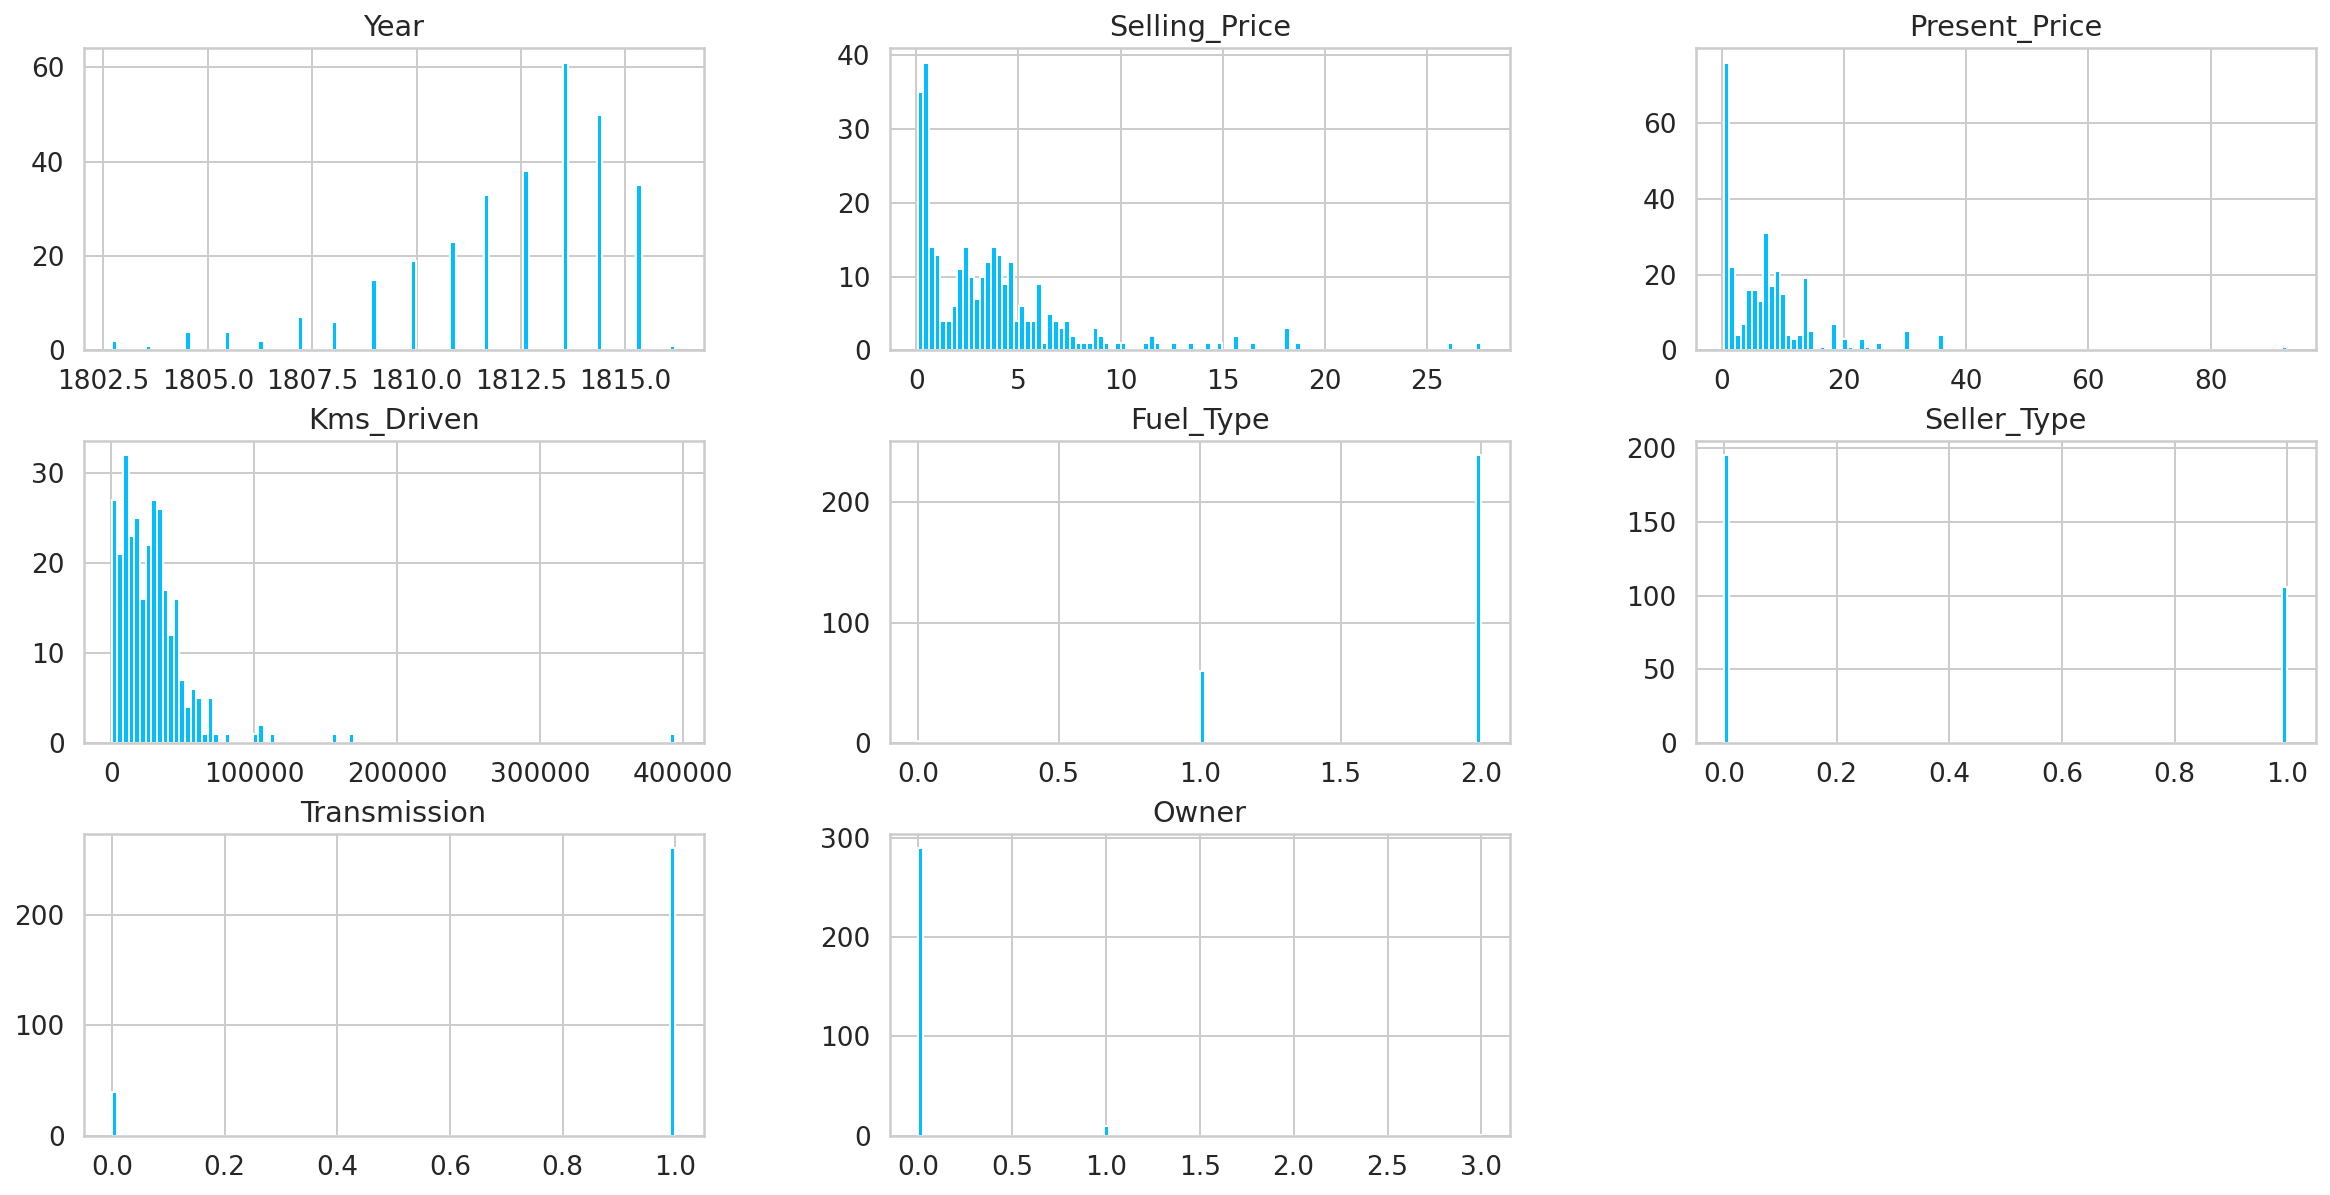

In [106]:
df1.hist(figsize=(20,10),bins=100)

In [107]:
print(X.shape)
print(y.shape)
df1.drop(['Car_Name'],axis=1)
df.drop(['Car_Name'],axis=1)

print(df.shape,df1.shape)

(301, 4)
(301, 1)
(301, 9) (301, 9)


In [108]:
inputs = torch.Tensor(X)
targets = torch.Tensor(y)

dataset = TensorDataset(inputs, targets)
train_ds, val_ds = random_split(dataset, [244, 57])  #divide into train and validation set
batch_size = 16 # batch size 

train_loader = DataLoader(train_ds, batch_size, shuffle=True) # loading train and test data 
val_loader = DataLoader(val_ds, batch_size)

In [109]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [110]:
input_size = len(input_cols)
output_size = len(output_cols)

class CarsModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.fc1 = nn.Linear(input_size,3) #output_size)      # creating a simple   NN with two layers            
        # self.fc2= nn.Linear(3,output_size)
        self.linear= nn.Linear(input_size,output_size)  # one layer

    def forward(self, xb):
        # xb = fun.relu(self.fc1(xb))
        # xb = torch.sigmoid(self.fc2(xb))
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)          
        loss = fun.l1_loss(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = fun.l1_loss(out, targets)                         
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # mean of the losses!
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 50 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))
            
model = CarsModel()

list(model.parameters())

[Parameter containing:
 tensor([[ 0.3823,  0.4150, -0.1171,  0.4593]], requires_grad=True),
 Parameter containing:
 tensor([-0.1096], requires_grad=True)]

In [111]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]  
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD): # using stochastic gradient descent to optimize L1 loss function
    history = []
    optimizer = opt_func(model.parameters(), lr)  #function to optimize parameters 
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch) 
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader) # evaluating output of epoch .
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

# Check the initial value that val_loss have
result = evaluate(model, val_loader)
print(result)

{'val_loss': 2417.920166015625}


In [114]:
epochs = 1000
lr = 1e-8
history1 = fit(epochs, lr, model, train_loader, val_loader)


Epoch [50], val_loss: 45.3463
Epoch [100], val_loss: 38.6631
Epoch [150], val_loss: 32.3715
Epoch [200], val_loss: 27.3161
Epoch [250], val_loss: 20.0964
Epoch [300], val_loss: 15.2893
Epoch [350], val_loss: 8.6804
Epoch [400], val_loss: 3.3386
Epoch [450], val_loss: 1.7060
Epoch [500], val_loss: 1.4795
Epoch [550], val_loss: 1.0294
Epoch [600], val_loss: 3.9551
Epoch [650], val_loss: 1.4040
Epoch [700], val_loss: 7.3077
Epoch [750], val_loss: 7.0871
Epoch [800], val_loss: 3.4091
Epoch [850], val_loss: 3.2571
Epoch [900], val_loss: 1.6713
Epoch [950], val_loss: 2.6157
Epoch [1000], val_loss: 1.2439


In [117]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

input, target = val_ds[0]
predict_single(input, target, model)
input, target = val_ds[5]
predict_single(input, target, model)
input, target = val_ds[2]
predict_single(input, target, model)
input, target = val_ds[9]
predict_single(input, target, model)
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([1.8090e+03, 9.5000e-01, 2.1330e+04, 0.0000e+00])
Target: tensor([0.3555])
Prediction: tensor([0.4212])
Input: tensor([1.8153e+03, 9.2900e+00, 2.9230e+04, 0.0000e+00])
Target: tensor([6.1225])
Prediction: tensor([3.5859])
Input: tensor([1.8090e+03, 5.2000e-01, 1.7380e+04, 0.0000e+00])
Target: tensor([0.1975])
Prediction: tensor([0.3912])
Input: tensor([1814.4000,   20.9100, 9480.0000,    0.0000])
Target: tensor([11.2575])
Prediction: tensor([9.1451])
Input: tensor([1.8153e+03, 5.4000e-01, 6.7940e+03, 0.0000e+00])
Target: tensor([0.3792])
Prediction: tensor([0.8002])
